In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [318]:
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")

# 1.1 Understand the dataset

## 1. How many unique companies are present in rounds2?

In [319]:
# Even after using encoding = "ISO-8859-1", I could see some junk characters
# I've found the below fix from discussion forum.
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
rounds2.company_permalink = rounds2.company_permalink.str.lower()
len(rounds2.company_permalink.unique())

66368

## 2. How many unique companies are present in companies?

In [320]:
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
companies.permalink = companies.permalink.str.lower()
len(companies.permalink.unique())

66368

## 4. Are there any companies in the rounds2 file which are not present in companies?

In [321]:
len(set(rounds2.company_permalink.unique()).difference(companies.permalink.unique()))

0

## 5. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [322]:
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on="permalink")
master_frame.name = master_frame.name.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


# 2.1  Average Values of Investments for Each of these Funding Types

In [323]:
#checking the null rows
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [324]:
# creating a new dataframe from master_frame with required columns which are required for this analysis. Creating a copy to keep the master_frame intact.
master_frame = master_frame[['funding_round_type', 'raised_amount_usd', 'category_list', 'country_code', 'name', 'company_permalink']].copy()
master_frame.isnull().sum()


funding_round_type        0
raised_amount_usd     19990
category_list          3410
country_code           8678
name                      1
company_permalink         0
dtype: int64

In [325]:
master_frame

,funding_round_type,raised_amount_usd,category_list,country_code,name,company_permalink
0,venture,10000000.0,Media,IND,#fame,/organization/-fame
1,venture,NaN,Application Platforms|Real Time|Social Network...,USA,:Qounter,/organization/-qounter
2,seed,700000.0,Application Platforms|Real Time|Social Network...,USA,:Qounter,/organization/-qounter
3,venture,3406878.0,Apps|Games|Mobile,NaN,"(THE) ONE of THEM,Inc.",/organization/-the-one-of-them-inc-
4,venture,2000000.0,Curated Web,CHN,0-6.com,/organization/0-6-com
...,...,...,...,...,...,...
114944,convertible_note,41313.0,Advertising|Mobile|Web Development|Wireless,HRV,Zzzzapp Wireless ltd.,/organization/zzzzapp-com
114945,seed,32842.0,Advertising|Mobile|Web Development|Wireless,HRV,Zzzzapp Wireless ltd.,/organization/zzzzapp-com
114946,venture,NaN,NaN,NaN,ERON,/organization/eron
114947,seed,18192.0,Consumer Electronics|Internet of Things|Teleco...,USA,asys,/organization/asys-2


In [326]:
# rows having at least one missing value
master_frame.isnull().any(axis=1)

0         False
1          True
2         False
3          True
4         False
          ...  
114944    False
114945    False
114946     True
114947    False
114948     True
Length: 114949, dtype: bool

In [327]:
# rows having all missing values
master_frame.isnull().all(axis=1).sum()

0

In [328]:
# sum of missing values in each row
master_frame.isnull().sum(axis=1)

0         0
1         1
2         0
3         1
4         0
         ..
114944    0
114945    0
114946    3
114947    0
114948    1
Length: 114949, dtype: int64

In [329]:
# summing up the missing values (column-wise)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_type     0.00
raised_amount_usd     17.39
category_list          2.97
country_code           7.55
name                   0.00
company_permalink      0.00
dtype: float64

In [330]:
master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [331]:
# removing null values
master_frame = master_frame[~np.isnan(master_frame.raised_amount_usd)]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)
#master_frame.dtypes

funding_round_type    0.00
raised_amount_usd     0.00
category_list         1.10
country_code          6.16
name                  0.00
company_permalink     0.00
dtype: float64

In [332]:
#master_frame = master_frame[~np.isnan(master_frame.category_list)] - is not supported as type of the column is object
master_frame = master_frame[~(master_frame.category_list.isnull())]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_type    0.00
raised_amount_usd     0.00
category_list         0.00
country_code          5.73
name                  0.00
company_permalink     0.00
dtype: float64

In [333]:
master_frame = master_frame[~(master_frame.country_code.isnull())]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_type    0.0
raised_amount_usd     0.0
category_list         0.0
country_code          0.0
name                  0.0
company_permalink     0.0
dtype: float64

In [334]:
# we are interested only in 4 types of funding type
types = ['venture', 'angel', 'seed', 'private_equity']
master_frame = master_frame.loc[master_frame['funding_round_type'].isin(types), :]

In [335]:
master_frame

,funding_round_type,raised_amount_usd,category_list,country_code,name,company_permalink
0,venture,10000000.0,Media,IND,#fame,/organization/-fame
2,seed,700000.0,Application Platforms|Real Time|Social Network...,USA,:Qounter,/organization/-qounter
4,venture,2000000.0,Curated Web,CHN,0-6.com,/organization/0-6-com
7,seed,43360.0,Biotechnology,CAN,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc
8,venture,719491.0,Biotechnology,CAN,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc
...,...,...,...,...,...,...
114941,venture,1587301.0,Enterprise Software,CHN,ZZNode Science and Technology,/organization/zznode-science-and-technology-co...
114942,seed,7000.0,Advertising|Mobile|Web Development|Wireless,HRV,Zzzzapp Wireless ltd.,/organization/zzzzapp-com
114943,seed,33149.0,Advertising|Mobile|Web Development|Wireless,HRV,Zzzzapp Wireless ltd.,/organization/zzzzapp-com
114945,seed,32842.0,Advertising|Mobile|Web Development|Wireless,HRV,Zzzzapp Wireless ltd.,/organization/zzzzapp-com


In [336]:
master_frame.groupby("funding_round_type").describe()

raised_amount_usd                                   \
                               count          mean           std  min   
funding_round_type                                                      
angel                         4400.0  9.715739e+05  7.710904e+06  0.0   
private_equity                1820.0  7.393849e+07  2.017765e+08  0.0   
seed                         21095.0  7.477937e+05  2.288318e+06  0.0   
venture                      47809.0  1.172422e+07  8.821571e+07  0.0   

                                                                     
                          25%         50%         75%           max  
funding_round_type                                                   
angel                152756.5    414906.0   1000000.0  4.945120e+08  
private_equity      5000000.0  20000000.0  75762572.0  4.745460e+09  
seed                  68816.5    300000.0   1000000.0  2.000000e+08  
venture             1600000.0   5000000.0  12000000.0  1.760000e+10

In [337]:
# getting the aggregate results
mean = master_frame.reset_index().groupby("funding_round_type", as_index=False).mean()

mean = mean.sort_values(by=["raised_amount_usd"], ascending=False)

<BarContainer object of 4 artists>

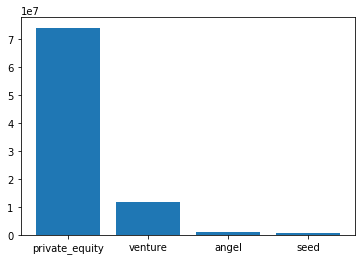

In [338]:
# plotting
plt.bar(mean['funding_round_type'],mean['raised_amount_usd'])

# 3.1 Analysing the Top 3 English-Speaking Countries

In [339]:
# Now we need only the details about venture type
master_frame = master_frame[master_frame["funding_round_type"]=="venture"]

In [340]:
master_frame

,funding_round_type,raised_amount_usd,category_list,country_code,name,company_permalink
0,venture,10000000.0,Media,IND,#fame,/organization/-fame
4,venture,2000000.0,Curated Web,CHN,0-6.com,/organization/0-6-com
8,venture,719491.0,Biotechnology,CAN,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc
10,venture,20000000.0,Analytics,USA,H2O.ai,/organization/0xdata
11,venture,1700000.0,Analytics,USA,H2O.ai,/organization/0xdata
...,...,...,...,...,...,...
114931,venture,7991547.0,Biotechnology,MYS,Zyraz Technology,/organization/zyraz-technology
114934,venture,140500.0,E-Commerce,USA,Zyrra,/organization/zyrra
114936,venture,8500000.0,Biotechnology,USA,Zystor,/organization/zystor
114937,venture,2686600.0,Biotechnology,AUT,Zytoprotec,/organization/zytoprotec


In [341]:
# contry-wise amount
top9 = master_frame.groupby("country_code").sum()
top9 = top9.sort_values(by=['raised_amount_usd'],ascending=False).head(9)
# in Billions
top9/1000000000


,raised_amount_usd
country_code,
USA,420.068029
CHN,39.338919
GBR,20.072813
IND,14.261509
CAN,9.482218
FRA,7.226851
ISR,6.854350
DEU,6.306922
JPN,3.167647


<BarContainer object of 9 artists>

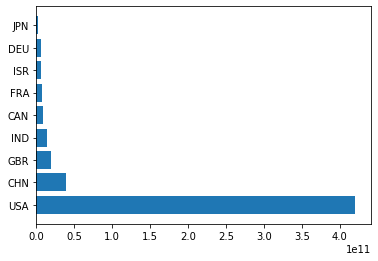

In [342]:
top9.sort_values(by=["raised_amount_usd"])
plt.barh(top9.index,top9['raised_amount_usd'])


# 5.1 Sector-wise Investment Analysis

In [343]:
# we are interested only in top 3 countries
master_frame = master_frame.loc[(master_frame.country_code=="USA")|(master_frame.country_code=="GBR")|(master_frame.country_code=="IND")]
#master_frame

In [344]:
# Selecting only primary category 
def get_primary(x):
    if '|' in x:
        return x.split('|')[0]
    else:
        return x

master_frame['primary_sector'] = master_frame['category_list'].apply(get_primary)

D:\Programs\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [345]:
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")

# To correct values such as 'A0lytics', 'Alter0tive Medicine', Business A0lytics, Veteri0ry, Task Ma0gement, Career Ma0gement etc; enterprise 2.na to enterprise 2.0
mapping.category_list = mapping.category_list.str.replace('0','na')
mapping.category_list = mapping.category_list.str.replace('2.na','2.0')

In [346]:
# Restructure the mapping to table to merge with master_frame
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising'])
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"category_list":"primary_sector","variable":"main_sector"})

In [347]:
# To handle the sectors like 'nanotechnology', 'natural Language Processing'
mapping.primary_sector = mapping.primary_sector.str.lower()
mapping

,primary_sector,main_sector
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
7,advanced materials,Manufacturing
15,agriculture,Manufacturing
...,...,...
5433,social recruiting,"Social, Finance, Analytics, Advertising"
5434,social television,"Social, Finance, Analytics, Advertising"
5435,social travel,"Social, Finance, Analytics, Advertising"
5446,stock exchanges,"Social, Finance, Analytics, Advertising"


In [348]:
master_frame.primary_sector = master_frame.primary_sector.str.lower()
master_frame

D:\Programs\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,funding_round_type,raised_amount_usd,category_list,country_code,name,company_permalink,primary_sector
0,venture,10000000.0,Media,IND,#fame,/organization/-fame,media
10,venture,20000000.0,Analytics,USA,H2O.ai,/organization/0xdata,analytics
11,venture,1700000.0,Analytics,USA,H2O.ai,/organization/0xdata,analytics
12,venture,8900000.0,Analytics,USA,H2O.ai,/organization/0xdata,analytics
22,venture,5000000.0,Apps|Cable|Distribution|Software,USA,1 Mainstream,/organization/1-mainstream,apps
...,...,...,...,...,...,...,...
114920,venture,12000000.0,Biotechnology,USA,ZYOMYX,/organization/zyomyx-inc,biotechnology
114922,venture,14219999.0,Biotechnology,USA,ZYOMYX,/organization/zyomyx-inc,biotechnology
114923,venture,555016.0,Biotechnology,USA,ZYOMYX,/organization/zyomyx-inc,biotechnology
114934,venture,140500.0,E-Commerce,USA,Zyrra,/organization/zyrra,e-commerce


In [349]:
master_frame = master_frame.merge(mapping, how = 'left', on ='primary_sector')

In [350]:
master_frame

,funding_round_type,raised_amount_usd,category_list,country_code,name,company_permalink,primary_sector,main_sector
0,venture,10000000.0,Media,IND,#fame,/organization/-fame,media,Entertainment
1,venture,20000000.0,Analytics,USA,H2O.ai,/organization/0xdata,analytics,"Social, Finance, Analytics, Advertising"
2,venture,1700000.0,Analytics,USA,H2O.ai,/organization/0xdata,analytics,"Social, Finance, Analytics, Advertising"
3,venture,8900000.0,Analytics,USA,H2O.ai,/organization/0xdata,analytics,"Social, Finance, Analytics, Advertising"
4,venture,5000000.0,Apps|Cable|Distribution|Software,USA,1 Mainstream,/organization/1-mainstream,apps,"News, Search and Messaging"
...,...,...,...,...,...,...,...,...
38798,venture,12000000.0,Biotechnology,USA,ZYOMYX,/organization/zyomyx-inc,biotechnology,Cleantech / Semiconductors
38799,venture,14219999.0,Biotechnology,USA,ZYOMYX,/organization/zyomyx-inc,biotechnology,Cleantech / Semiconductors
38800,venture,555016.0,Biotechnology,USA,ZYOMYX,/organization/zyomyx-inc,biotechnology,Cleantech / Semiconductors
38801,venture,140500.0,E-Commerce,USA,Zyrra,/organization/zyrra,e-commerce,Others


In [351]:
#master_frame[master_frame.primary_sector=="enterprise 2.0"]

In [352]:
master_frame[master_frame.main_sector.isnull()]

,funding_round_type,raised_amount_usd,category_list,country_code,name,company_permalink,primary_sector,main_sector
7345,venture,125000.0,Natural Gas Uses|Service Providers|Services,USA,Clean Vehicle Solutions,/organization/clean-vehicle-solutions,natural gas uses,NaN
10162,venture,250000.0,Adaptive Equipment|Innovation Management|Speec...,USA,Dolores Speech Products,/organization/dolores-speech-products,adaptive equipment,NaN
12375,venture,68569234.0,Racing,GBR,FIA Formula E,/organization/fia-formula-e,racing,NaN
12630,venture,194000000.0,Specialty Retail,USA,Five Below,/organization/five-below,specialty retail,NaN
14956,venture,9486929.0,Biotechnology and Semiconductor|Diagnostics|He...,USA,HealthTell,/organization/healthtell,biotechnology and semiconductor,NaN
17882,venture,862000.0,Rapidly Expanding|Software|Usability|User Expe...,USA,Justinmind,/organization/justinmind,rapidly expanding,NaN
23816,venture,3172815.0,Product Search,USA,Omega Point Research,/organization/omega-point-research,product search,NaN
29949,venture,2499999.0,GreenTech|Hardware|Home Automation|Internet of...,USA,Sense,/organization/sense-labs-inc-,greentech,NaN
30210,venture,1100000.0,Retirement,USA,ShantiNiketan Inc.,/organization/shantiniketan-incorporated,retirement,NaN
30211,venture,2000000.0,Retirement,USA,ShantiNiketan Inc.,/organization/shantiniketan-incorporated,retirement,NaN


In [353]:
# removing the unnecessary rows
master_frame = master_frame[~(master_frame.main_sector.isnull())]

In [354]:
master_frame.groupby("main_sector").describe()

raised_amount_usd                \
                                                    count          mean   
main_sector                                                               
Automotive & Sports                                 580.0  2.356792e+07   
Cleantech / Semiconductors                         8492.0  1.481295e+07   
Entertainment                                      2006.0  9.548015e+06   
Health                                             3429.0  9.707227e+06   
Manufacturing                                      2630.0  1.011212e+07   
News, Search and Messaging                         4727.0  1.064018e+07   
Others                                             9114.0  1.027474e+07   
Social, Finance, Analytics, Advertising            7814.0  1.173324e+07   

                                                                           \
                                                  std     min         25%   
main_sector                                                                 
Automotive & Sports                      1.071888e+08    29.0  1579335.50   
Cleantech / Semiconductors               1.923581e+08     0.0  1625000.00   
Entertainment                            1.968007e+07     0.0  1610797.25   
Health                                   1.601316e+07     0.0  1113247.00   
Manufacturing                            1.737130e+07  1000.0  1492872.50   
News, Search and Messaging               2.765181e+07   750.0  1807338.00   
Others                                   2.711399e+07     0.0  1500000.00   
Social, Finance, Analytics, Advertising  5.970031e+07     0.0  2000000.00   

                                                                               
                                               50%          75%           max  
main_sector                                                                    
Automotive & Sports                      5582110.0  13775000.00  1.200000e+09  
Cleantech / Semiconductors               5800000.0  15317082.50  1.760000e+10  
Entertainment                            4722865.0  10000000.00  4.750000e+08  
Health                                   4100000.0  12000000.00  3.200000e+08  
Manufacturing                            5000000.0  12186157.25  3.500000e+08  
News, Search and Messaging               5000000.0  10700000.00  9.150000e+08  
Others                                   5000000.0  11000000.00  1.000000e+09  
Social, Finance, Analytics, Advertising  5168255.5  11700000.00  4.700000e+09

In [355]:
# D1 -> For USA, 5-15M USD including both
D1 = master_frame.loc[(master_frame.country_code == 'USA') & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
D1_Details = D1.groupby("main_sector").agg({"main_sector":"count", "raised_amount_usd":"sum"}).rename(columns={"main_sector": "Total number", "raised_amount_usd": "Total amount"})

In [356]:
D1 = pd.merge(D1, D1_Details, how='left', on='main_sector')
#D1

In [357]:
# D2 for GBR
D2 = master_frame.loc[(master_frame.country_code == 'GBR') & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
D2_Details = D2.groupby("main_sector").agg({"main_sector":"count", "raised_amount_usd":"sum"}).rename(columns={"main_sector": "Total number", "raised_amount_usd": "Total amount"})

In [358]:
D2 = pd.merge(D2, D2_Details, how='left', on='main_sector')

In [359]:
# D3 for IND
D3 = master_frame.loc[(master_frame.country_code == 'IND') & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]
D3_Details = D3.groupby("main_sector").agg({"main_sector":"count", "raised_amount_usd":"sum"}).rename(columns={"main_sector": "Total number", "raised_amount_usd": "Total amount"})
D3 = pd.merge(D3, D3_Details, how='left', on='main_sector')
#D3

In [360]:
D1_Details['Total number'].sum()

12063

In [361]:
D2_Details['Total number'].sum()

621

In [362]:
D3_Details['Total number'].sum()

328

In [363]:
round(D1_Details['Total amount'].sum() / 1000000, 3)

107757.097

In [364]:
round(D2_Details['Total amount'].sum() / 1000000, 3)

5379.079

In [365]:
round(D3_Details['Total amount'].sum() / 1000000, 3)

2949.544

In [366]:
D1_Details.sort_values(by=['Total number'],ascending=False)

,Total number,Total amount
main_sector,,
Others,2950,2.632101e+10
"Social, Finance, Analytics, Advertising",2714,2.380738e+10
Cleantech / Semiconductors,2350,2.163343e+10
"News, Search and Messaging",1583,1.397157e+10
Health,909,8.211859e+09
Manufacturing,799,7.258553e+09
Entertainment,591,5.099198e+09
Automotive & Sports,167,1.454104e+09


In [367]:
D2_Details.sort_values(by=['Total number'],ascending=False)

,Total number,Total amount
main_sector,,
Others,147,1.283624e+09
"Social, Finance, Analytics, Advertising",133,1.089404e+09
Cleantech / Semiconductors,130,1.163990e+09
"News, Search and Messaging",73,6.157462e+08
Entertainment,56,4.827847e+08
Manufacturing,42,3.619403e+08
Health,24,2.145375e+08
Automotive & Sports,16,1.670516e+08


In [368]:
D3_Details.sort_values(by=['Total number'],ascending=False)

,Total number,Total amount
main_sector,,
Others,110,1.013410e+09
"Social, Finance, Analytics, Advertising",60,5.505496e+08
"News, Search and Messaging",52,4.338345e+08
Entertainment,33,2.808300e+08
Manufacturing,21,2.009000e+08
Cleantech / Semiconductors,20,1.653800e+08
Health,19,1.677400e+08
Automotive & Sports,13,1.369000e+08


In [369]:
# Checking the total amount received by each company
# USA, 1st top sector
res1 = D1.loc[D1.main_sector == "Others"].groupby("company_permalink").sum()
res1.sort_values(by=["raised_amount_usd"], ascending=False)


,raised_amount_usd,Total number,Total amount
company_permalink,,,
/organization/virtustream,64300000.0,17700,1.579260e+11
/organization/capella,54968051.0,17700,1.579260e+11
/organization/airtight-networks,54201907.0,14750,1.316050e+11
/organization/decarta,52100000.0,14750,1.316050e+11
/organization/black-duck-software,51000000.0,17700,1.579260e+11
...,...,...,...
/organization/startforce,5000000.0,2950,2.632101e+10
/organization/lumeta,5000000.0,2950,2.632101e+10
/organization/storenvy,5000000.0,2950,2.632101e+10


In [370]:
# USA, 2nd top sector
res2 = D1.loc[D1.main_sector == "Social, Finance, Analytics, Advertising"].groupby("company_permalink").sum()
res2.sort_values(by=["raised_amount_usd"], ascending=False)

,raised_amount_usd,Total number,Total amount
company_permalink,,,
/organization/shotspotter,67933006.0,18998,1.666516e+11
/organization/demandbase,63000000.0,13570,1.190369e+11
/organization/intacct,61800000.0,13570,1.190369e+11
/organization/netbase,60600000.0,18998,1.666516e+11
/organization/lotame,59700000.0,13570,1.190369e+11
...,...,...,...
/organization/booyah,5000000.0,2714,2.380738e+10
/organization/peerspace,5000000.0,2714,2.380738e+10
/organization/veri-tax,5000000.0,2714,2.380738e+10


In [371]:
# Checking the name corresponding to "/organization/shotspotter"
D1.loc[D1.company_permalink == "/organization/shotspotter"]

,funding_round_type,raised_amount_usd,category_list,country_code,name,company_permalink,primary_sector,main_sector,Total number,Total amount
9398,venture,10500000.0,Analytics|Security,USA,SST Inc. (Formerly ShotSpotter),/organization/shotspotter,analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
9399,venture,9682006.0,Analytics|Security,USA,SST Inc. (Formerly ShotSpotter),/organization/shotspotter,analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
9400,venture,6851000.0,Analytics|Security,USA,SST Inc. (Formerly ShotSpotter),/organization/shotspotter,analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
9401,venture,12000000.0,Analytics|Security,USA,SST Inc. (Formerly ShotSpotter),/organization/shotspotter,analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
9402,venture,9400000.0,Analytics|Security,USA,SST Inc. (Formerly ShotSpotter),/organization/shotspotter,analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
9403,venture,12000000.0,Analytics|Security,USA,SST Inc. (Formerly ShotSpotter),/organization/shotspotter,analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10
9404,venture,7500000.0,Analytics|Security,USA,SST Inc. (Formerly ShotSpotter),/organization/shotspotter,analytics,"Social, Finance, Analytics, Advertising",2714,2.380738e+10


In [372]:
# GBR, top sector
second = D2.loc[D2.main_sector=="Others"].groupby("company_permalink").sum()
second.sort_values(by=["raised_amount_usd"], ascending=False)

,raised_amount_usd,Total number,Total amount
company_permalink,,,
/organization/electric-cloud,37000000.0,588,5.134497e+09
/organization/sensage,36250000.0,588,5.134497e+09
/organization/enigmatic,32500000.0,441,3.850873e+09
/organization/silverrail-technologies,29000000.0,441,3.850873e+09
/organization/opencloud,27972766.0,441,3.850873e+09
...,...,...,...
/organization/vector-watch,5000000.0,147,1.283624e+09
/organization/udex,5000000.0,147,1.283624e+09
/organization/bullguard,5000000.0,147,1.283624e+09


In [373]:
D2.loc[D2.company_permalink=="/organization/electric-cloud"]

,funding_round_type,raised_amount_usd,category_list,country_code,name,company_permalink,primary_sector,main_sector,Total number,Total amount
158,venture,9000000.0,Software,GBR,Electric Cloud,/organization/electric-cloud,software,Others,147,1.283624e+09
159,venture,8000000.0,Software,GBR,Electric Cloud,/organization/electric-cloud,software,Others,147,1.283624e+09
160,venture,8000000.0,Software,GBR,Electric Cloud,/organization/electric-cloud,software,Others,147,1.283624e+09
161,venture,12000000.0,Software,GBR,Electric Cloud,/organization/electric-cloud,software,Others,147,1.283624e+09


In [374]:
# GBR, 2nd top sector
second1 = D2.loc[D2.main_sector=="Social, Finance, Analytics, Advertising"].groupby("company_permalink").sum()
second1.sort_values(by=["raised_amount_usd"], ascending=False)

,raised_amount_usd,Total number,Total amount
company_permalink,,,
/organization/celltick-technologies,37500000.0,532,4.357616e+09
/organization/mythings,34000000.0,532,4.357616e+09
/organization/zopa,32900000.0,399,3.268212e+09
/organization/imagini,28550000.0,399,3.268212e+09
/organization/marketinvoice,25553007.0,399,3.268212e+09
...,...,...,...
/organization/moo,5000000.0,133,1.089404e+09
/organization/rangespan,5000000.0,133,1.089404e+09
/organization/the-fizzback-group,5000000.0,133,1.089404e+09


In [375]:
# alternative way to find the name
D2.loc[D2.main_sector=="Social, Finance, Analytics, Advertising"].groupby("name").sum().sort_values(by=["raised_amount_usd"], ascending=False)

,raised_amount_usd,Total number,Total amount
name,,,
Celltick Technologies,37500000.0,532,4.357616e+09
myThings,34000000.0,532,4.357616e+09
Zopa,32900000.0,399,3.268212e+09
VisualDNA,28550000.0,399,3.268212e+09
MarketInvoice,25553007.0,399,3.268212e+09
...,...,...,...
The Fizzback Group,5000000.0,133,1.089404e+09
Tamoco,5000000.0,133,1.089404e+09
Rangespan,5000000.0,133,1.089404e+09


In [376]:
# India, top sector
third = D3.loc[D3.main_sector=="Others"].groupby("company_permalink").sum()
third.sort_values(by=["raised_amount_usd"], ascending=False)

,raised_amount_usd,Total number,Total amount
company_permalink,,,
/organization/firstcry-com,39000000.0,330,3.040229e+09
/organization/myntra,38000000.0,440,4.053638e+09
/organization/commonfloor,32900000.0,330,3.040229e+09
/organization/pepperfry-com,28000000.0,330,3.040229e+09
/organization/itzcash-card-ltd,25000000.0,220,2.026819e+09
...,...,...,...
/organization/liases-foras,5000000.0,110,1.013410e+09
/organization/securens,5000000.0,110,1.013410e+09
/organization/appsdaily-solutions,5000000.0,110,1.013410e+09


In [377]:
#D3.loc[D3.main_sector=="Others"].groupby("name").sum().sort_values(by=["raised_amount_usd"], ascending=False)

In [378]:
# India, 2nd top sector
third1 = D3.loc[D3.main_sector=="Social, Finance, Analytics, Advertising"].groupby("company_permalink").sum()
third1.sort_values(by=["raised_amount_usd"], ascending=False)

,raised_amount_usd,Total number,Total amount
company_permalink,,,
/organization/manthan-systems,50700000.0,240,2.202198e+09
/organization/komli-media,28000000.0,180,1.651649e+09
/organization/shopclues-com,25000000.0,120,1.101099e+09
/organization/intarvo,21900000.0,120,1.101099e+09
/organization/grameen-financial-services,21556050.0,120,1.101099e+09
/organization/bankbazaar,19000000.0,120,1.101099e+09
/organization/microland,18300000.0,120,1.101099e+09
/organization/eka-software-solutions,16000000.0,120,1.101099e+09
/organization/qyuki,15400000.0,120,1.101099e+09


In [379]:
#D3.loc[D3.main_sector=="Social, Finance, Analytics, Advertising"].groupby("name").sum().sort_values(by=["raised_amount_usd"], ascending=False)

In [380]:
p1 = D1_Details.sort_values(by=["Total number"], ascending=False)
p2 = D2_Details.sort_values(by=["Total number"], ascending=False)
p3 = D3_Details.sort_values(by=["Total number"], ascending=False)

In [381]:
import seaborn as sns 

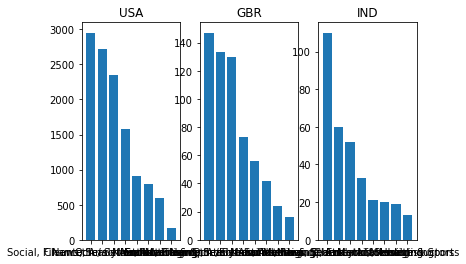

In [382]:
plt.subplot(1, 3, 1)
plt.title('USA')
plt.bar(p1.index,p1['Total number'])

# subplot 2
plt.subplot(1, 3, 2)
plt.title('GBR')
plt.bar(p2.index,p2['Total number'])

# subplot 3
plt.subplot(1, 3, 3)
plt.title('IND')
plt.bar(p3.index,p3['Total number'])
plt.show()